In [1]:
import pandas as pd
from tqdm import tqdm

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 설정

In [ ]:
# rf

In [2]:
# 제출 점수 : 

# 데이터 불러오기

In [5]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# 데이터 확인

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [7]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,...,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,...,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,...,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,...,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,...,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

In [9]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,...,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,...,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,...,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,...,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,...,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


# 필요 데이터 추출

In [ ]:
# person_rn :  사용자번호
# contents_rn :  컨텐츠번호
# contents_open_dt :  컨텐츠 열람 일시

## 훈련에 의미가 적은 열 제거

In [10]:
# id, contents_open_dt 제거
# 모든 값이 1인 person_prefer_f, person_prefer_g 열 제거
# person_rn, contents_rn 제거

In [11]:
train = train.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g'], axis=1) 
test = test.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g'], axis=1)

In [12]:
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,...,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target
0,True,True,True,False,False,False,1,4,3,5,...,1,2,1608,275,1,4,139,618822,354805,1
1,False,False,False,True,True,False,1,3,4,1,...,1,2,1608,275,1,4,133,571659,346213,0
2,False,False,False,True,False,False,2,0,3,5,...,1,1,1600,94,1,4,53,399816,206408,0
3,False,False,False,True,False,False,2,0,2,5,...,1,2,1608,275,5,3,74,827967,572323,0
4,True,True,True,False,False,False,1,3,4,5,...,1,2,1608,275,1,4,74,831614,573899,0


In [13]:
test.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,...,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn
0,True,False,False,True,True,True,1,1,2,1,...,2,1,2,1147,839,1,5,263,393790,236865
1,False,False,False,True,False,False,2,0,2,2,...,1,1,2,1611,278,1,4,263,394058,236572
2,True,False,False,True,True,True,2,3,2,1,...,1,1,2,1817,490,3,4,177,1002061,704612
3,True,False,False,True,True,True,1,2,2,5,...,1,1,2,101,150,5,3,177,1000813,704652
4,True,False,False,True,False,False,1,6,4,5,...,1,1,1,985,1097,1,4,177,111146,704413


## 데이터 나누기

### train_test_split

In [17]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]
X.shape, y.shape

((501951, 30), (501951,))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25, shuffle=True, stratify=train['target'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((376463, 30), (125488, 30), (376463,), (125488,))

# 모델 학습/예측

In [20]:
rf = RandomForestClassifier(random_state=0, n_estimators=10, n_jobs=3,)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=3, random_state=0)

# 교차검증

In [30]:
kfold = KFold(random_state=0, n_splits=5, shuffle=True)
scoring = {'accuracy' : make_scorer(accuracy_score), 'precision': make_scorer(precision_score),
'recall':make_scorer(recall_score), 'roc_auc':make_scorer(roc_auc_score), 'f1 score': make_scorer(f1_score)}

## train 셋 교차 검증

In [31]:
# 훈련 셋 검증
train_result = cross_validate(rf, X_train, y_train, cv=kfold, scoring=scoring)
train_result

{'fit_time': array([6.54229069, 6.55559468, 6.8247838 , 6.62022042, 6.42820859]),
 'score_time': array([0.40142655, 0.45492053, 0.48052049, 0.39058137, 0.4289813 ]),
 'test_accuracy': array([0.57860624, 0.57394446, 0.57694606, 0.5801546 , 0.58206715]),
 'test_precision': array([0.59504897, 0.58674051, 0.59026388, 0.5956548 , 0.59961729]),
 'test_recall': array([0.49494521, 0.49362371, 0.49517822, 0.49829941, 0.49851514]),
 'test_roc_auc': array([0.57869634, 0.57376245, 0.57671108, 0.58012851, 0.58221835]),
 'test_f1 score': array([0.54040038, 0.53616923, 0.53855626, 0.54264508, 0.54441211])}

In [32]:
train_result_df = pd.DataFrame(train_result)
train_result_df

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_f1 score
0,6.542291,0.401427,0.578606,0.595049,0.494945,0.578696,0.540400
1,6.555595,0.454921,0.573944,0.586741,0.493624,0.573762,0.536169
2,6.824784,0.480520,0.576946,0.590264,0.495178,0.576711,0.538556
3,6.620220,0.390581,0.580155,0.595655,0.498299,0.580129,0.542645
4,6.428209,0.428981,0.582067,0.599617,0.498515,0.582218,0.544412


In [33]:
train_result_df.mean(axis=0)

fit_time          6.594220
score_time        0.431286
test_accuracy     0.578344
test_precision    0.593465
test_recall       0.496112
test_roc_auc      0.578303
test_f1 score     0.540437
dtype: float64

## test 셋 교차 검증

In [34]:
# 테스트 셋 검증
test_result = cross_validate(rf, X_test, y_test, cv=kfold, scoring=scoring)
test_result

{'fit_time': array([1.94642472, 2.24000216, 1.77482748, 1.79176641, 1.7839489 ]),
 'score_time': array([0.17153883, 0.13841772, 0.11516142, 0.18014622, 0.12091637]),
 'test_accuracy': array([0.56510479, 0.57387043, 0.5695673 , 0.57110412, 0.56787664]),
 'test_precision': array([0.57443711, 0.59675108, 0.58324287, 0.58553208, 0.58133925]),
 'test_recall': array([0.47545988, 0.49095912, 0.47317854, 0.48031307, 0.4808076 ]),
 'test_roc_auc': array([0.56439608, 0.57501583, 0.56911624, 0.57090558, 0.56775538]),
 'test_f1 score': array([0.52028304, 0.53871037, 0.52247713, 0.52772903, 0.52631579])}

In [35]:
test_result_df = pd.DataFrame(test_result)
test_result_df

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_f1 score
0,1.946425,0.171539,0.565105,0.574437,0.475460,0.564396,0.520283
1,2.240002,0.138418,0.573870,0.596751,0.490959,0.575016,0.538710
2,1.774827,0.115161,0.569567,0.583243,0.473179,0.569116,0.522477
3,1.791766,0.180146,0.571104,0.585532,0.480313,0.570906,0.527729
4,1.783949,0.120916,0.567877,0.581339,0.480808,0.567755,0.526316


In [36]:
test_result_df.mean(axis=0)

fit_time          1.907394
score_time        0.145236
test_accuracy     0.569505
test_precision    0.584260
test_recall       0.480144
test_roc_auc      0.569438
test_f1 score     0.527103
dtype: float64

# GridSearchCV

In [40]:
%%time

scoring = make_scorer(f1_score)
params = {'max_depth':range(10, 100), 'min_samples_split':range(2,10), 'n_estimators':range(10,100)}
grid = GridSearchCV(rf, param_grid = params, scoring=scoring, n_jobs=3, cv=kfold, verbose=2)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 64800 candidates, totalling 324000 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  2.0min
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed: 16.3min
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed: 68.4min
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed: 124.0min
[Parallel(n_jobs=3)]: Done 1007 tasks      | elapsed: 211.1min


# 예측

In [ ]:
best_rf = grid.best_estimator_
pred = best_rf.predict(test)

In [ ]:
pred

# 제출파일 생성

In [23]:
submission = pd.read_csv('../data/sample_submission.csv')
submission['target'] = pred['Label']

submission.to_csv('sub_ver0.5.csv', index=False)

# 모델 분석 그래프

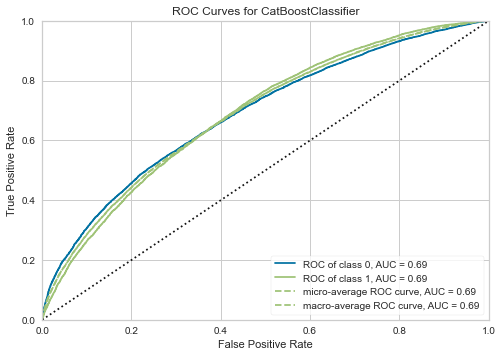

In [25]:
plot_model(cat)